# Data

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
import re

/home/wormsin/miniconda3/envs/bp-calculator/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## data analysis

In [5]:
df = pd.read_csv('hiv_profit.csv')
df.drop(columns = ['line item value'], inplace=True)
df.head()

,project code,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,vendor,molecule/test type,brand,dosage,dosage form,manufacturing site,first line designation,freight cost (usd),reliability,Delivery Delay Risk,weight,profit
0,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0.0,Test kit,Ranbaxy Fine Chemicals LTD,True,780.34,40,0.0,13.0,25919.040
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,Nevirapine,Generic,10.0,Oral suspension,"Aurobindo Unit III, India",True,4521.50,166,0.0,358.0,291648.000
2,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit",Determine,0.0,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,True,1653.78,40,0.0,171.0,1881600.000
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Lamivudine,Generic,150.0,Tablet,"Ranbaxy, Paonta Shahib, India",True,16007.06,166,0.0,1855.0,5991052.032
4,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,Stavudine,Generic,30.0,Capsule,"Aurobindo Unit III, India",True,45450.08,166,0.0,7590.0,5720064.000


In [6]:
profile  = ProfileReport(df)
profile.to_file("hiv_profit_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 315.84it/s]


In [164]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [165]:
df.drop(columns=['id','pq #','po / so #', 'delivery recorded date', 'item description', 'unit of measure (per pack)','unit price', 'line item quantity', 'pack price', 'unit price',"asn/dn #" ], inplace=True)

In [166]:
df["shipment mode"] = df["shipment mode"].fillna(df["shipment mode"].mode()[0])
df["line item insurance (usd)"] = df["line item insurance (usd)"].fillna(df["line item insurance (usd)"].median())

In [167]:
# Функция для извлечения первого значения дозировки
def extract_first_dosage(dosage):
    if pd.isnull(dosage) or dosage.strip() == "":
        return None  # Обработка NaN или пустых строк
    # Используем регулярное выражение для извлечения первого числа
    match = re.search(r'\d+', dosage)
    return int(match.group()) if match else None

# Применение функции
df['dosage'] = df['dosage'].apply(extract_first_dosage)
df['dosage'].fillna(0, inplace=True)

/tmp/ipykernel_17296/729179619.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dosage'].fillna(0, inplace=True)


In [157]:
df.columns

Index(['project code', 'country', 'managed by', 'fulfill via',
       'vendor inco term', 'shipment mode', 'pq first sent to client date',
       'po sent to vendor date', 'scheduled delivery date',
       'delivered to client date', 'product group', 'sub classification',
       'vendor', 'molecule/test type', 'brand', 'dosage', 'dosage form',
       'line item value', 'manufacturing site', 'first line designation',
       'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [146]:
df['line item insurance (usd)'].unique()

array([4.70400e+01, 1.92000e+02, 4.86000e+00, ..., 5.28404e+03,
       1.34030e+02, 8.58200e+01])

In [177]:
#date

df["po sent to vendor date"] = pd.to_datetime(df["po sent to vendor date"], format='%m/%d/%Y', errors='coerce')

In [181]:
df["po sent to vendor date"].notna().sum()

np.int64(4592)

## profit dataset

In [162]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [168]:
# Calculate the frequency of each category
category_counts = df["project code"].value_counts()

# Map the category frequency back to the data
df["reliability"] = df["project code"].map(category_counts)

In [169]:
date_format = "%d-%b-%y"
df['delivered to client date'] = pd.to_datetime(df['delivered to client date'], format=date_format)
df['scheduled delivery date'] = pd.to_datetime(df['scheduled delivery date'], format=date_format)

# Находим разницу в днях и записываем в новый столбец 'Days_Difference'
df["Delivery Delay Risk"] = (df['delivered to client date'] - df['scheduled delivery date']).dt.days
df.drop(columns=['delivered to client date', 'scheduled delivery date'], inplace=True)

In [174]:
def sigmoid_normalize(x):
    return 2 / (1 + np.exp(-x)) - 1

# Применяем к столбцу и сохраняем результат в новый столбец
df['Delivery Delay Risk'] = df["Delivery Delay Risk"].apply(sigmoid_normalize)

In [182]:
df.drop(columns=['pq first sent to client date', 'po sent to vendor date'], inplace=True)

In [183]:
df.columns

Index(['project code', 'country', 'managed by', 'fulfill via',
       'vendor inco term', 'shipment mode', 'product group',
       'sub classification', 'vendor', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'line item value', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)', 'reliability', 'Delivery Delay Risk',
       'Normalized'],
      dtype='object')

In [197]:
def to_numeric_or_nan(x):
    try:
        return pd.to_numeric(x)
    except ValueError:
        return np.nan

# Преобразуем все значения в числовой формат, заменив нецифровые на NaN
df['freight cost (usd)'] = df['freight cost (usd)'].apply(to_numeric_or_nan)

# Применяем интерполяцию для замены NaN на средние значения (или другие методы)
df['freight cost (usd)'] = df['freight cost (usd)'].interpolate()

In [201]:
df.drop(columns=['Normalized'], inplace=True)

In [204]:
df.columns

Index(['project code', 'country', 'managed by', 'fulfill via',
       'vendor inco term', 'shipment mode', 'product group',
       'sub classification', 'vendor', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'line item value', 'manufacturing site',
       'first line designation', 'freight cost (usd)',
       'line item insurance (usd)', 'reliability', 'Delivery Delay Risk',
       'weight'],
      dtype='object')

In [207]:
df[['line item insurance (usd)', 'freight cost (usd)', 'line item value', 'weight']]

,line item insurance (usd),freight cost (usd),line item value,weight
0,47.04,780.34,551.00,13.000000
1,47.04,4521.50,6200.00,358.000000
2,47.04,1653.78,40000.00,171.000000
3,47.04,16007.06,127360.80,1855.000000
4,47.04,45450.08,121600.00,7590.000000
...,...,...,...,...
10319,705.79,3410.00,599655.60,1469.500000
10320,161.71,3410.00,137389.44,1443.666667
10321,5284.04,3410.00,5140114.74,1417.833333
10322,134.03,3410.00,113871.80,1392.000000


In [254]:
df['profit'] = df['line item insurance (usd)']*10**(np.log10(df['line item value']))
df.drop(columns=['line item insurance (usd)'], inplace = True)

/home/wormsin/miniconda3/envs/bp-calculator/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



In [266]:
cols = df.columns.tolist()

# Меняем местами последние два столбца
cols[-1], cols[-2] = cols[-2], cols[-1]

# Переупорядочиваем DataFrame по новому порядку столбцов
df = df[cols]

In [267]:
df.isna().sum()

project code              0
country                   0
managed by                0
fulfill via               0
vendor inco term          0
shipment mode             0
product group             0
sub classification        0
vendor                    0
molecule/test type        0
brand                     0
dosage                    0
dosage form               0
manufacturing site        0
first line designation    0
freight cost (usd)        0
reliability               0
Delivery Delay Risk       0
weight                    0
line item value           0
profit                    0
dtype: int64

In [268]:
df.to_csv('hiv_profit.csv', index=False)

## ML

In [1]:
import pandas as pd
import numpy as np
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df_profit = pd.read_csv('hiv_profit.csv')

In [3]:
df_profit.drop(columns=['line item value'], inplace=True)

## data prep

In [4]:
def detect_outliers_iqr(df, column):
    """
    Обнаружение выбросов методом IQR.
    Возвращает индексы строк с выбросами.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return outliers, df


In [5]:
# Проверка на выбросы для каждого числового столбца
for column in df_profit.select_dtypes(include=np.number).columns:
    outliers, df_profit = detect_outliers_iqr(df_profit, column)
    print(f"Выбросы в столбце '{column}':", len(list(outliers)))

Выбросы в столбце 'dosage': 0
Выбросы в столбце 'freight cost (usd)': 652
Выбросы в столбце 'reliability': 0
Выбросы в столбце 'Delivery Delay Risk': 0
Выбросы в столбце 'weight': 987
Выбросы в столбце 'profit': 1761


In [6]:
numerical_columns = df_profit.select_dtypes(include=np.number).columns[:-1]

robust_scaler = RobustScaler()
df_scaled = df_profit.copy()
df_scaled[numerical_columns] = robust_scaler.fit_transform(df_profit[numerical_columns])

In [7]:
profit_scaler = RobustScaler()
df_scaled["profit"] = profit_scaler.fit_transform(df_profit[['profit']])

# Обратное преобразование
#predictions_denormalized = scaler.inverse_transform([[x] for x in predictions_scaled])

## trainning

In [8]:
X = df_scaled[df_scaled.columns[:-1]]
y = df_scaled['profit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### ERB

In [10]:
model = ExplainableBoostingRegressor()
model.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [23]:
y_pred = model.predict(X_test)

# 5. Оценка модели: метрики MSE и R^2 (для регрессии)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.3314749582400909
R^2 Score: 0.651300933640174


In [26]:
np.mean(y_test-y_pred)

0.0035306601050354115

In [15]:
y_true_unscaled = profit_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1)).T[0]
y_pred_unscaled = profit_scaler.inverse_transform(y_pred.reshape(-1, 1)).T[0]

In [16]:
non_zero_indices = y_true_unscaled != 0
mape = np.mean(np.abs((y_true_unscaled[non_zero_indices] - y_pred_unscaled[non_zero_indices]) / y_true_unscaled[non_zero_indices])) * 100

print("MAPE (с добавлением epsilon):", np.log10(mape))
print(np.log10(np.mean(y_true_unscaled)))

MAPE (с добавлением epsilon): 7.638226176582089
7.406841901501908


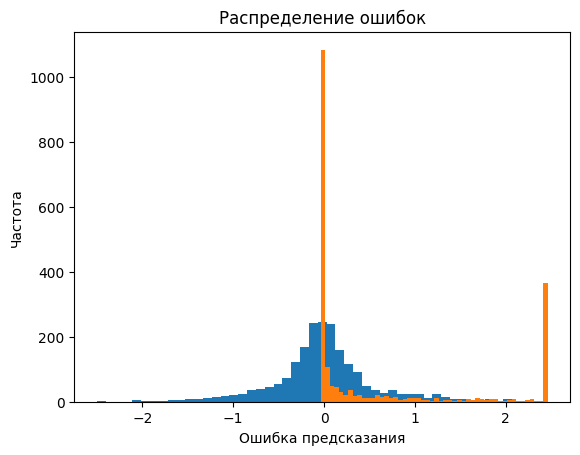

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt


errors = y_test-y_pred
plt.hist(errors, bins=50)
plt.hist(y_test, bins=50)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.show()

In [153]:
np.log10(np.mean(np.abs(y_true_unscaled)))

np.float64(7.392552659022218)

In [24]:
global_explanation = model.explain_global()
show(global_explanation)

<!-- http://127.0.0.1:7001/140336468286656/ -->

In [25]:
sample = X_test  # первый набор из тестовых данных
local_explanation = model.explain_local(sample, y_test)
show(local_explanation)

<!-- http://127.0.0.1:7001/140336416242704/ -->

### NN

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [221]:
df_scaled = pd.read_csv('hiv_profit_scaled.csv')

In [222]:
categorical_columns = df_scaled.select_dtypes(include=['category', 'object']).columns
numerical_columns = df_scaled.select_dtypes(include=np.number).columns[:-1]

In [223]:
from sklearn.preprocessing import LabelEncoder

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем каждый категориальный столбец в индексы
for col in categorical_columns:
    df_scaled[col] = label_encoder.fit_transform(df_scaled[col])

In [224]:
# Разделим данные на признаки и целевую переменную
X_categorical = df_scaled[categorical_columns]  # Категориальные признаки
X_numerical = df_scaled[numerical_columns]  # Числовые признаки
y = df_scaled['profit']/10**8  # Целевая переменная

# Разделяем на тренировочную и тестовую выборку
X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_categorical, X_numerical, y, test_size=0.2, random_state=42
)

In [226]:
embedding_layers = []
input_layers = []

for col in categorical_columns:
    # Размер эмбеддинга для каждого столбца: min(50, количество_уникальных_значений // 2)
    num_unique_values = len(df_scaled[col].unique())
    embedding_dim = min(50, num_unique_values // 2)
    
    # Создаем входной слой для каждого категориального признака
    input_layer = Input(shape=(1,), dtype='int32')
    input_layers.append(input_layer)
    
    # Создаем эмбеддинг для каждого категориального признака
    embedding_layer = Embedding(input_dim=num_unique_values, output_dim=embedding_dim)(input_layer)
    embedding_layers.append(Flatten()(embedding_layer))  # Преобразуем в одномерный вектор


In [227]:
numerical_layers = []
for col in numerical_columns:
    input_layer = Input(shape=(1,), dtype='float32')
    #dense_layer = Dense(8, activation='relu')(input_layer)  # Параметры слоя можно варьировать
    numerical_layers.append(input_layer)

In [228]:
merged = Concatenate()(embedding_layers + numerical_layers)
dense1 = Dense(128, activation='relu')(merged)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
output = Dense(1)(dense3)

model = Model(inputs=input_layers + numerical_layers, outputs=output)
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [229]:
train_data = [X_cat_train[col].values.reshape(-1, 1).astype('int32') for col in categorical_columns] + [X_num_train[col].values.reshape(-1, 1).astype('float32') for col in numerical_columns]
test_data = [X_cat_test[col].values.reshape(-1, 1).astype('int32') for col in categorical_columns] + [X_num_test[col].values.reshape(-1, 1).astype('float32') for col in numerical_columns]


In [242]:
model.fit(train_data, y_train, epochs=200, batch_size=32)


Epoch 1/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0090
Epoch 2/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0102
Epoch 3/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0104
Epoch 4/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.0095
Epoch 5/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0112
Epoch 6/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.0089
Epoch 7/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0086
Epoch 8/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0094
Epoch 9/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.0087
Epoch 10/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0085
Epoch 11/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.0099
Epoch 12/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0084
Epoch 13/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0085
Epoch 14/200
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0085
Epoch 15/200
25

In [243]:
test_predictions = model.predict(test_data)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


In [244]:
y_pred = test_predictions.T[0]

In [233]:
y_test = y_test.to_numpy()

In [245]:
y_test

array([9.85855328e-01, 1.09055121e-02, 2.94662794e-01, ...,
       2.57678750e-04, 2.87066830e-02, 9.40464000e-05])

In [247]:
non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100

print("MAPE (с добавлением epsilon):", mape)
print(np.mean(y_test))

MAPE (с добавлением epsilon): 85267900.758495
0.2476753163372205


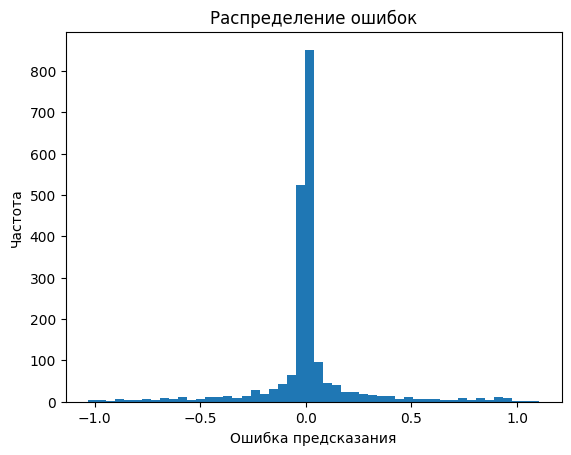

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt


errors = y_test-y_pred
plt.hist(errors, bins=50)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.show()